### NEURAL NETWORKS, Lab4 - Hopfield Neural Network

## Excercise 1
Test the followin tool for visualizing numpy arrays as pixel images

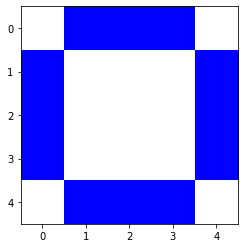

In [56]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import math

data_both = np.random.randint(0, 2, size=(8, 8))

cmapmine = ListedColormap(['w', 'b'], N=2)

def visualize(array_to_plot):
    fig, ax = plt.subplots()
    ax.imshow(array_to_plot, cmap=cmapmine, vmin=-1, vmax=1)
    plt.show()

#please try to create other matrices and visualize them:
test_array = np.array([[-1, 1, 1, 1, -1],[1, -1, -1, -1, 1],[1, -1, -1, -1, 1],[1, -1, -1, -1, 1],[-1, 1, 1, 1, -1]])
    
visualize(test_array)

## Excercise 2
Please, implement the Hopfield Neural Network, using numpy package

In [57]:
class HNN:


    #use __init__(self,d) function to construct the HNN object (d - number of neurons) and to set the starting values of weights and bias
    def __init__(self, d):
        #YOUR CODE HERE
        self.d = d
        self.w = np.zeros((d,d))
        self.b = np.zeros(d)
    
    #implement a function accepting a pattern dataset as a parameter and calculating the weights and biases of the HNN. 
    def learn(self, pattern_dataset):
        #YOUR CODE HERE
        
        pdr = np.array([np.reshape(x, self.d) for x in pattern_dataset])
        N = pdr.shape[0]
        
        self.w = np.dot(pdr.T, pdr)/N
        for i in range(self.d):
            self.w[i][i] = 0.0
        
        self.b = pdr.mean(axis=0)
        
    
    #implement a function for restoring the given pattern
    def restore_one(self, pattern):
        #YOUR CODE HERE
        rest = np.dot(self.w, np.reshape(pattern, self.d))+self.b
        return np.reshape(np.where(rest >= 0.0, 1, -1), ((int)(math.sqrt(self.d)), (int)(math.sqrt(self.d))))
    
    #implement a function for restoring a set of patterns
    def restore(self, set_of_patterns):
        #YOUR CODE HERE
        a = []
        for pat in set_of_patterns:
            a.append(self.restore_one(pat))            
        return a
    
    #implement a function returning the energy of HNN for a given input
    def energy(self, pattern):
        #YOUR CODE HERE
        e1 = 0.5*np.dot(np.reshape(pattern, (-1,1)).T, np.dot(self.w, pattern.reshape(-1,1)))[0][0]
        e2 = np.dot(self.b, np.reshape(pattern, self.d))
        return -e1-e2
        

## Excercise 3
1.Prepare a few training patterns in a number lower than 0.138*d)

2.Visualize your patterns

3.Create a HNN object, train it using your pattern dataset

4.Compare the energy values for your patterns with energies for some random patterns

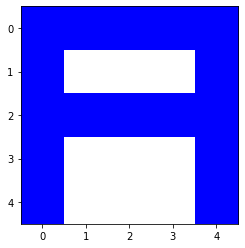

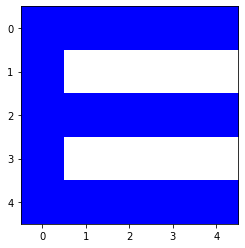

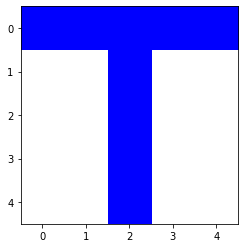

In [58]:
p1 = np.array([[1, 1, 1, 1, 1],[1, -1, -1, -1, 1],[1, 1, 1, 1, 1],[1, -1, -1, -1, 1],[1, -1, -1, -1, 1]])
p2 = np.array([[1, 1, 1, 1, 1],[1, -1, -1, -1, -1],[1, 1, 1, 1, 1],[1, -1, -1, -1, -1],[1, 1, 1, 1, 1]])
p3 = np.array([[1, 1, 1, 1, 1],[-1, -1, 1, -1, -1],[-1, -1, 1, -1, -1],[-1, -1, 1, -1, -1],[-1, -1, 1, -1, -1]])

visualize(p1)
visualize(p2)
visualize(p3)

In [77]:
hnn = HNN(25)
hnn.learn([p1, p2, p3])

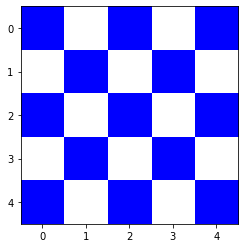

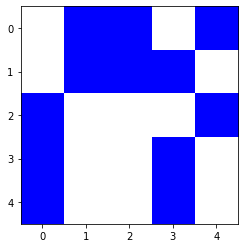

In [78]:
prand1 = np.array([[1, -1, 1, -1, 1], [-1, 1, -1, 1, -1], [1, -1, 1, -1, 1], [-1, 1, -1, 1, -1], [1, -1, 1, -1, 1]])
prand2 = np.array([[-1, 1, 1, -1, 1], [-1, 1, 1, 1, -1], [1, -1, -1, -1, 1], [1, -1, -1, 1, -1], [1, -1, -1, 1, -1]])

visualize(prand1)
visualize(prand2)

In [80]:
print(hnn.energy(p1))
print(hnn.energy(p2))
print(hnn.energy(p3))
print(hnn.energy(prand1))
print(hnn.energy(prand2))

-142.33333333333331
-142.99999999999997
-100.33333333333334
11.666666666666664
12.333333333333332


## Excercise 4

1.Prepare a few testing patterns:
    
    two slightly disturbed versions of your training patterns;
    
    two seriously disturbed versions of your training patterns;
    
    two completely random
    
2.Visualize your testing patterns, calculate their energies

3.Try restoring the testing patterns 

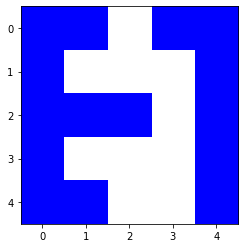

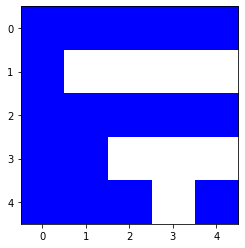

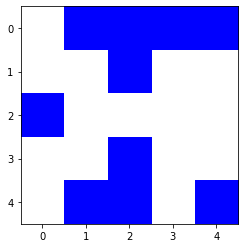

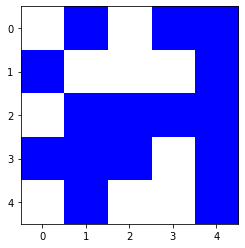

In [104]:
# YOUR CODE HERE
p1_dist = np.array([[1, 1, -1, 1, 1],[1, -1, -1, -1, 1],[1, 1, 1, -1, 1],[1, -1, -1, -1, 1],[1, 1, -1, -1, 1]])
p2_dist = np.array([[1, 1, 1, 1, 1],[1, -1, -1, -1, -1],[1, 1, 1, 1, 1],[1, 1, -1, -1, -1],[1, 1, 1, -1, 1]])
p3_dist = np.array([[-1, 1, 1, 1, 1],[-1, -1, 1, -1, -1],[1, -1, -1, -1, -1],[-1, -1, 1, -1, -1],[-1, 1, 1, -1, 1]])
p1_dist2 = np.array([[-1, 1, -1, 1, 1],[1, -1, -1, -1, 1],[-1, 1, 1, 1, 1],[1, 1, 1, -1, 1],[-1, 1, -1, -1, 1]])

visualize(p1_dist)
visualize(p2_dist)
visualize(p3_dist)
visualize(p1_dist2)

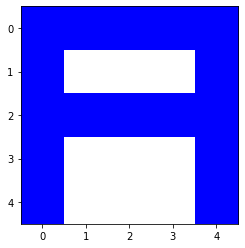

energy before:  -87.0
energy after:  -142.33333333333331


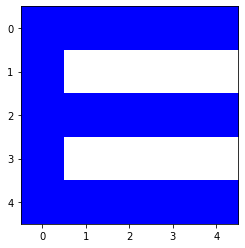

energy before:  -111.0
energy after:  -142.99999999999997


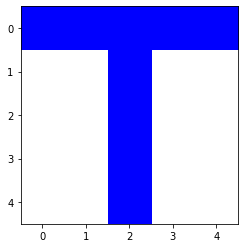

energy before:  -33.0
energy after:  -100.33333333333334


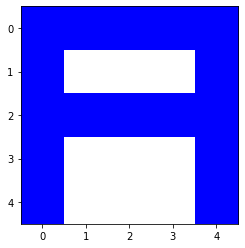

energy before:  -17.666666666666664
energy after:  -142.33333333333331


In [105]:
dist = [p1_dist, p2_dist, p3_dist, p1_dist2]
res = hnn.restore(dist)

for i in range(len(res)):
    visualize(res[i])
    print('energy before: ', hnn.energy(dist[i]))
    print('energy after: ', hnn.energy(res[i]))

## Excercise 5

Try to repeat Excercises 3 and 4 with a number of patterns greater than 0.138*N

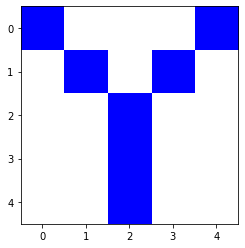

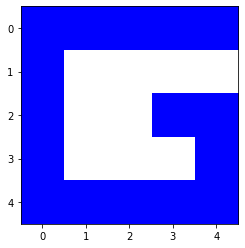

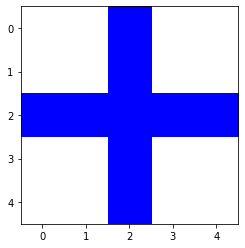

In [106]:
#YOUR CODE HERE

p4 = np.array([[1, -1, -1, -1, 1],[-1, 1, -1, 1, -1],[-1, -1, 1, -1, -1],[-1, -1, 1, -1, -1], [-1, -1, 1, -1, -1]])
p5 = np.array([[1, 1, 1, 1, 1],[1, -1, -1, -1, -1],[1, -1, -1, 1, 1],[1, -1, -1, -1, 1], [1, 1, 1, 1, 1]])
p6 = np.array([[-1, -1, 1, -1, -1],[-1, -1, 1, -1, -1],[1, 1, 1, 1, 1],[-1, -1, 1, -1, -1], [-1, -1, 1, -1, -1]])

visualize(p4)
visualize(p5)
visualize(p6)

In [107]:
hnn2 = HNN(25)
hnn2.learn([p1, p2, p3, p4, p5, p6])

In [108]:
print(hnn2.energy(p1))
print(hnn2.energy(p2))
print(hnn2.energy(p3))
print(hnn2.energy(p4))
print(hnn2.energy(p5))
print(hnn2.energy(p6))
print(hnn2.energy(prand1))
print(hnn2.energy(prand2))

-86.3333333333333
-101.66666666666663
-68.33333333333334
-76.33333333333333
-99.66666666666664
-56.33333333333333
3.6666666666666674
12.333333333333332


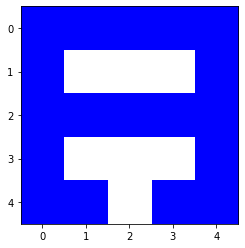

energy before:  -55.0
energy after:  -86.3333333333333


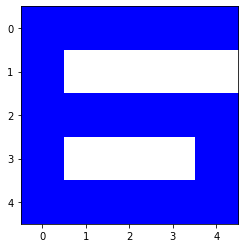

energy before:  -73.66666666666666
energy after:  -101.66666666666663


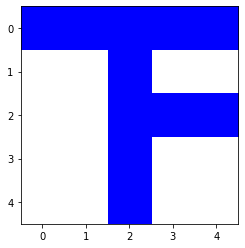

energy before:  -19.666666666666664
energy after:  -68.33333333333334


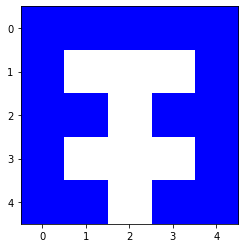

energy before:  -7.0
energy after:  -86.3333333333333


In [109]:
res2 = hnn2.restore(dist)

for i in range(len(res2)):
    visualize(res2[i])
    print('energy before: ', hnn2.energy(dist[i]))
    print('energy after: ', hnn2.energy(res[i]))